Dataset info:

The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

The data was divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, …, X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

This Dataset collect from UCI Machine Learning Repository


---


summary:

The original dataset consists of EEG recordings from 500 individuals, each with 4097 data points representing 23.6 seconds of brain activity.

The data is divided into 23 chunks, each containing 178 data points for 1 second.

The last column represents labels (y) with five categories indicating different states of brain activity.

Classes 2-5 represent non-seizure conditions, while class 1 represents epileptic seizure. Many studies focus on binary classification, distinguishing seizure (class 1) from non-seizure (classes 2-5).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
ESR = pd.read_csv("Epileptic Seizure Recognition.csv")

In [5]:
ESR.head(5)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [6]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [7]:
ESR['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [8]:
ESR['tgt'] = ESR['y'].apply(lambda x: 0 if x > 1 else 1)

In [9]:
ESR.head(5)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,tgt
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [10]:
ESR['tgt'].value_counts()

tgt
0    9200
1    2300
Name: count, dtype: int64

<Axes: >

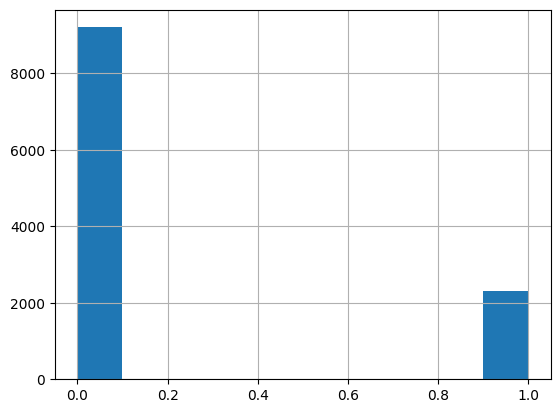

In [11]:
ESR['tgt'].hist()

In [12]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

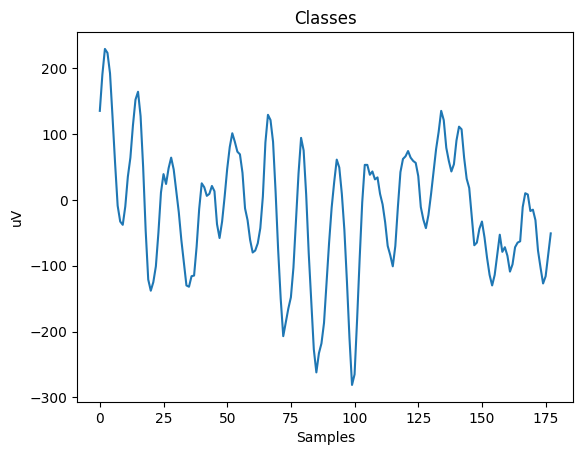

In [13]:
plt.plot(X[0,:])
plt.title('Classes')
plt.ylabel('uV')
plt.xlabel('Samples')
plt.show()

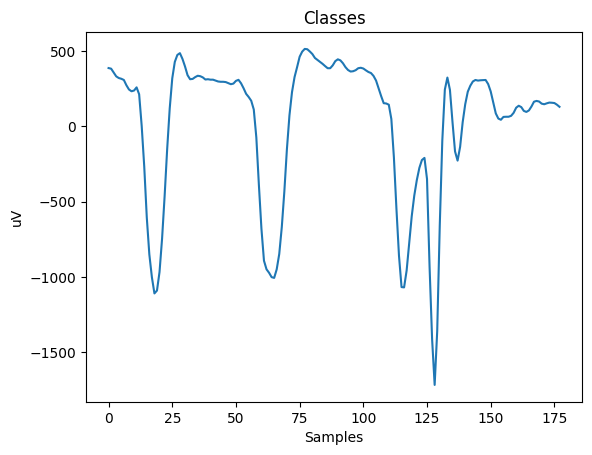

In [14]:
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.xlabel('Samples')
plt.show()

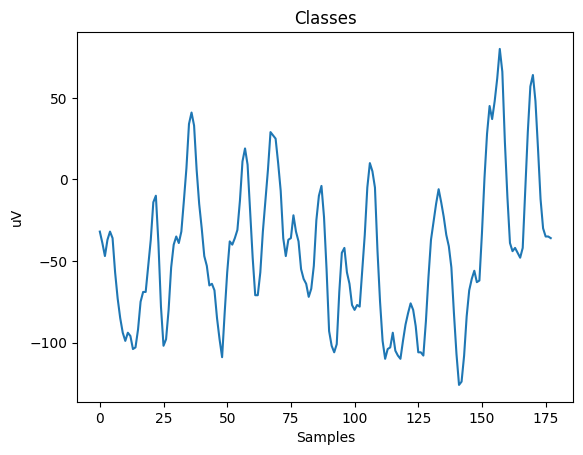

In [15]:
plt.plot(X[2,:])
plt.title('Classes')
plt.ylabel('uV')
plt.xlabel('Samples')
plt.show()

FEATURES EXTRACTION

In [16]:
import pandas as pd
import numpy as np
import scipy.stats

# 1. Mean and Median
mean_values = X.mean(axis=1)
median_values = np.median(X, axis=1)

# 2. Standard Deviation
std_deviation_values = np.std(X, axis=1)

# 3. Skewness and Kurtosis
skewness_values = scipy.stats.skew(X, axis=1)
kurtosis_values = scipy.stats.kurtosis(X, axis=1)

# 4. Minimum and Maximum
min_values = np.min(X, axis=1)
max_values = np.max(X, axis=1)

# 5. Root Mean Square (RMS)
rms_values = np.sqrt(np.mean(X**2, axis=1))

# 6. Zero Crossing Rate
zero_crossings = np.count_nonzero(np.diff(np.sign(X), axis=1) != 0, axis=1)
zero_crossing_rate = zero_crossings / X.shape[1]

# 7. Entropy
entropy_values = np.apply_along_axis(scipy.stats.entropy, axis=1, arr=X)

# 8. Energy
energy_values = np.sum(X**2, axis=1)

# Create a new DataFrame with the computed features
X_features = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Std Deviation': std_deviation_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values,
    'Min': min_values,
    'Max': max_values,
    'RMS': rms_values,
    'Zero Crossing Rate': zero_crossing_rate,
    # 'Entropy': entropy_values,
    'Energy': energy_values
})

X_features

,Mean,Median,Std Deviation,Skewness,Kurtosis,Min,Max,RMS,Zero Crossing Rate,Energy
0,-16.910112,-11.5,95.710958,-0.200327,0.067411,-281,229,97.193309,0.129213,1681484
1,28.112360,220.5,471.835823,-1.511088,1.341888,-1716,513,472.672559,0.044944,39768644
2,-44.044944,-44.5,44.186380,0.494485,-0.240414,-126,80,62.389048,0.067416,692846
3,-68.910112,-69.0,15.923723,0.367125,0.212160,-105,-22,70.726010,0.000000,890386
4,-6.651685,-1.0,38.693001,-0.462741,-0.250516,-103,78,39.260581,0.196629,274368
...,...,...,...,...,...,...,...,...,...,...
11495,5.157303,7.5,38.268536,-0.185539,-0.966425,-79,73,38.614488,0.067416,265412
11496,5.674157,27.5,163.078548,0.009039,0.523230,-388,471,163.177232,0.067416,4739572
11497,6.752809,8.5,44.164855,0.092115,-0.410145,-90,121,44.678125,0.151685,355312
11498,-38.842697,-40.0,63.428346,0.519187,0.272000,-157,148,74.376812,0.061798,984680


In [17]:
y = ESR['tgt']
y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: tgt, Length: 11500, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train_no_feat, X_test_no_feat, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle =True)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=0, shuffle =True)

In [19]:
# K-Nearest Neighbors
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)


# Train the classifier
knn.fit(X_train_no_feat, y_train)

# Make predictions
y_pred = knn.predict(X_test_no_feat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy (no features): {accuracy}")




# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy2}")



print(f"Difference: {accuracy2 - accuracy}")


K-Nearest Neighbors Accuracy (no features): 0.9243478260869565
K-Nearest Neighbors Accuracy: 0.9530434782608695
Difference: 0.02869565217391301


In [20]:
# Decision Tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()


# Train the classifier
clf.fit(X_train_no_feat, y_train)

# Make predictions
y_pred = clf.predict(X_test_no_feat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (no features): {accuracy}")




# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy2}")


print(f"Difference: {accuracy2 - accuracy}")



Decision Tree Accuracy (no features): 0.9405797101449276
Decision Tree Accuracy: 0.9684057971014493
Difference: 0.027826086956521667


In [21]:
# Random Forest
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators


# Train the classifier
clf.fit(X_train_no_feat, y_train)

# Make predictions
y_pred = clf.predict(X_test_no_feat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy (no features): {accuracy}")



# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy2}")



print(f"Difference: {accuracy2 - accuracy}")


Random Forest Classifier Accuracy (no features): 0.9779710144927536
Random Forest Classifier Accuracy: 0.9773913043478261
Difference: -0.0005797101449275255
